# Assignment 3

## 1. Data pre-processing

First two cells below are dedicated to import of libraries and data.

In [1]:
# Imports
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zoneinfo import ZoneInfo
 
file_path_risoe = 'Data\\Risoe\\risoe_m_all.nc'
file_paths_borglum = 'Data\\Borglum\\borglum_all.nc'

data_risoe = nc.Dataset(file_path_risoe, 'r')
data_borglum = nc.Dataset(file_paths_borglum, 'r')

base_date_risoe = datetime(1995, 11, 20, 16, 25, 0, tzinfo=ZoneInfo('Europe/Copenhagen'))

variables_data = {}

for var_name in data_risoe.variables:
    var_data = data_risoe.variables[var_name][:]
    variables_data[var_name] = var_data[:10]

df = pd.DataFrame(variables_data)
display(df)

,time,ws44,ws44_qc,ws77,ws77_qc,ws125,ws125_qc,wd77,wd77_qc,wd125,...,td01,td01_qc,rain,rain_qc,press,press_qc,rhum,rhum_qc,grad,grad_qc
0,0,NaN,NaN,3.36,0.0,3.04,0.0,205.0,0.0,208.0,...,75.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,10,NaN,NaN,3.05,0.0,3.17,0.0,205.0,0.0,214.0,...,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,20,NaN,NaN,3.59,0.0,3.64,0.0,204.0,0.0,209.0,...,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,30,NaN,NaN,3.87,0.0,3.77,0.0,202.0,0.0,209.0,...,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,40,NaN,NaN,4.74,0.0,4.28,0.0,201.0,0.0,212.0,...,75.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
5,50,NaN,NaN,4.91,0.0,4.91,0.0,206.0,0.0,213.0,...,78.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
6,60,NaN,NaN,4.98,0.0,5.35,0.0,203.0,0.0,210.0,...,75.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7,70,NaN,NaN,5.39,0.0,5.58,0.0,203.0,0.0,206.0,...,76.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
8,80,NaN,NaN,5.76,0.0,5.75,0.0,193.0,0.0,207.0,...,76.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
9,90,NaN,NaN,5.52,0.0,5.38,0.0,200.0,0.0,205.0,...,77.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [2]:
# Variables in sets
print(f"Risoe data variables: \n{data_risoe.variables.keys()}")

Risoe data variables: 
dict_keys(['time', 'ws44', 'ws44_qc', 'ws77', 'ws77_qc', 'ws125', 'ws125_qc', 'wd77', 'wd77_qc', 'wd125', 'wd125_qc', 't003', 't003_qc', 't044', 't044_qc', 't118', 't118_qc', 'td01', 'td01_qc', 'rain', 'rain_qc', 'press', 'press_qc', 'rhum', 'rhum_qc', 'grad', 'grad_qc'])


['ws44', 'ws77', 'ws125', 'wd77', 'wd125']


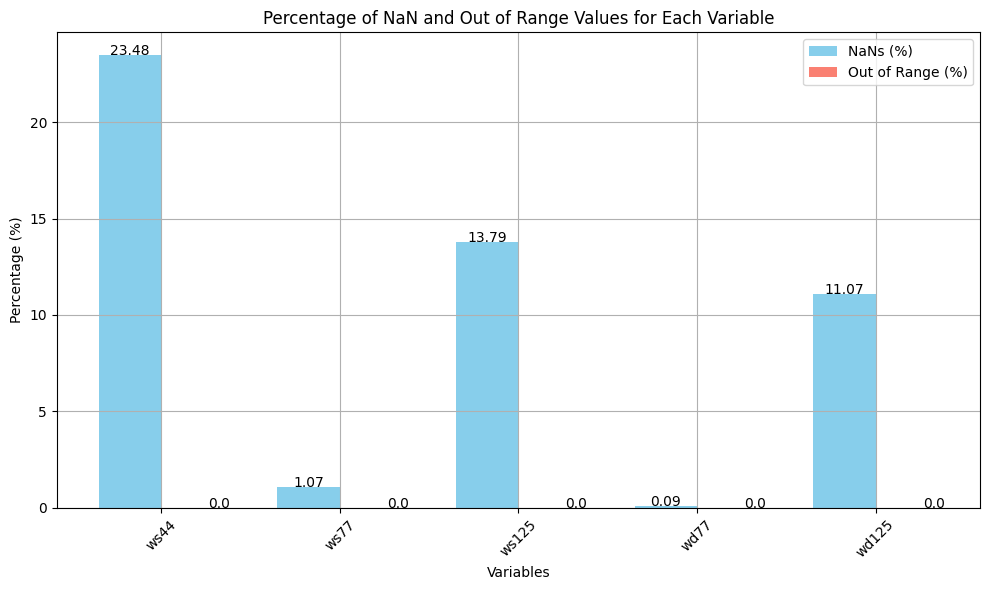

In [3]:
wd_range_min = 0
wd_range_max = 360

ws_range_min = 0

variables = []

for var in data_risoe.variables.keys():
    if ('wd' in var or 'ws' in var) and 'qc' not in var:
        variables.append(var)

print(variables)

vals = {}

for var_name in variables:
    var_data = data_risoe.variables[var_name][:]

    total = len(var_data)
    nan_count = np.count_nonzero(np.isnan(var_data))
    if 'wd' in var_name:
        oor_count = np.sum((var_data < wd_range_min) | (var_data > wd_range_max))
    else:
        oor_count = np.sum(var_data < ws_range_min)

    vals[var_name] = {}
    vals[var_name]['nans'] = (nan_count/total) * 100
    vals[var_name]['oors'] = (oor_count/total) * 100

# Converted to DF for easier handling
df_vals = pd.DataFrame(vals).T

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_vals))

plt.bar(index, df_vals['nans'], bar_width, label='NaNs (%)', color='skyblue')
plt.bar(index + bar_width, df_vals['oors'], bar_width, label='Out of Range (%)', color='salmon')

plt.xlabel('Variables')
plt.ylabel('Percentage (%)')
plt.title('Percentage of NaN and Out of Range Values for Each Variable')
plt.xticks(index + bar_width / 2, df_vals.index, rotation=45)  # Set x-axis labels
plt.legend()
plt.grid(True)
plt.tight_layout()

i = 0
for key in vals.keys():
    plt.text(i, vals[key]['nans'], round(vals[key]['nans'],2), ha = 'center')
    i+=0.5
    plt.text(i, vals[key]['oors'], round(vals[key]['oors'],2), ha = 'center')
    i+=0.5

plt.show()


It can be concluded from the diagram above that there are most measurments taken at 77 meters, hence the data for this height which will be used for the model.

The data for 125 meters measurements *could* be used as 'Signals at higher altitude are generally better', but there are far more NaN values than for the 77 meters signals.
The data for 44 meters measurements is possibly the worst choise here: not only there is no wind direction data, it has by far the most NaN values and measurements are taken at lowest altitude.

Secondary assessment below will be to evalute if 77m is a good choice in terms of seasons coverage.

,date,ws77,wd77
season,,,
1,157682,157682,157682
2,157858,157858,157858
3,156239,156239,156239
4,149515,149515,149515


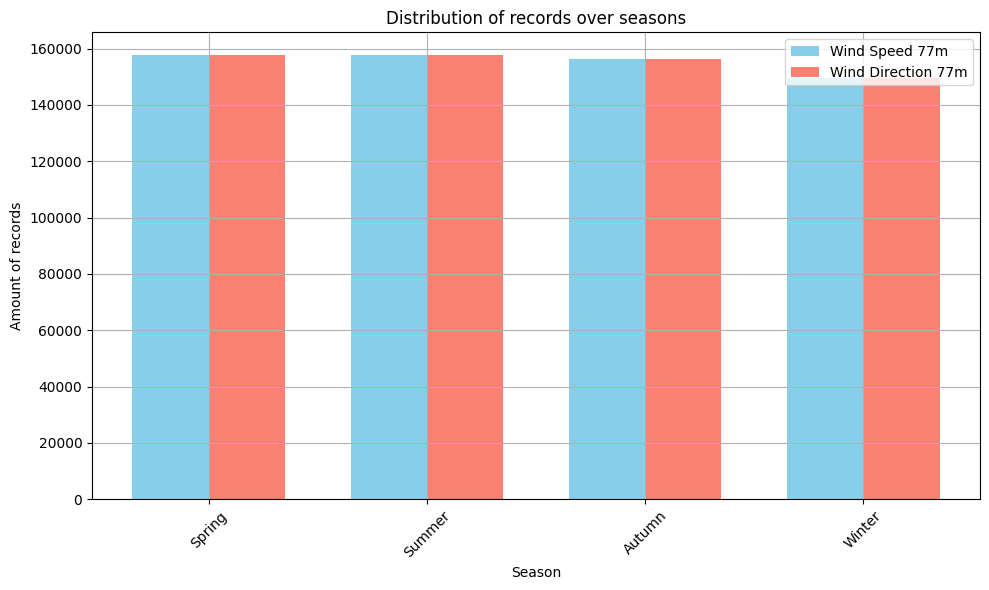

Normalized range for ws77: 0.053713700760026656
Normalized range for wd77: 0.053713700760026656


In [4]:
# Season coverage
# Time conversion

data_risoe_mast = pd.DataFrame({
    'date': [base_date_risoe + timedelta(minutes=int(x)) for x in data_risoe.variables['time'][:]],
    'ws77': data_risoe.variables['ws77'][:],
    'wd77': data_risoe.variables['wd77'][:]
})

data_risoe_mast = data_risoe_mast.dropna()

def get_season(date):
	if date.month in [3, 4, 5]:
		return 1 # Spring
	elif date.month in [6, 7, 8]:
		return 2 # Summer
	elif date.month in [9, 10, 11]:
		return 3 # Autumn
	elif date.month in [12, 1, 2]:
		return 4 # Winter
	else:
		return -1

data_risoe_mast['season'] = [get_season(date) for date in data_risoe_mast['date']]

count_summary = data_risoe_mast.groupby('season').agg(lambda x: x.notna().sum())

display(count_summary)
#print(count_summary['date'][1])
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(count_summary))

plt.bar(index, count_summary['ws77'], bar_width, label='Wind Speed 77m', color='skyblue')
plt.bar(index + bar_width, count_summary['wd77'], bar_width, label='Wind Direction 77m', color='salmon')

plt.xlabel('Season')
plt.ylabel('Amount of records')
plt.title('Distribution of records over seasons')
plt.xticks(index + bar_width / 2, ['Spring', 'Summer', 'Autumn', 'Winter'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

print(f"Normalized range for ws77: {(count_summary['ws77'].max()-count_summary['ws77'].min())/count_summary['ws77'].mean()}")
print(f"Normalized range for wd77: {(count_summary['wd77'].max()-count_summary['wd77'].min())/count_summary['wd77'].mean()}")


The differences in the amount of records are present, but they are small enough to claim that signals are *somewhat* equally distributed across seasons. The measurements will be used further processed and used for model training.

In [5]:
# Load meso data for Risoe
data_risoe_meso = pd.read_csv('Data\\Risoe\\meso_Risoe.csv')
display(data_risoe_meso)
print(f"Columns of meso data: \n{data_risoe_meso.columns}")

,TIMESTAMP,HGT,RHO060,RHO080,RHO100,RHO120,RHO140,RHO160,RHO180,RHO200,...,TKE_PBL220,RH060,RH080,RH100,RH120,RH140,RH160,RH180,RH200,RH220
0,2001-06-10 15:00:00,7.770000,1.234208,1.232239,1.230234,1.228201,1.226122,1.224005,1.221824,1.219543,...,0.10,69.34,69.59,69.78,69.91,69.88,69.70,69.36,68.77,68.25
1,2001-06-10 16:00:00,7.770000,1.230668,1.228701,1.226703,1.224679,1.222648,1.220613,1.218572,1.216524,...,0.20,63.85,64.41,64.98,65.55,66.13,66.71,67.30,67.89,68.49
2,2001-06-10 17:00:00,7.770000,1.230054,1.228041,1.226011,1.223966,1.221926,1.219891,1.217852,1.215805,...,0.10,63.23,63.78,64.35,64.95,65.57,66.21,66.84,67.49,68.13
3,2001-06-10 18:00:00,7.770000,1.229966,1.227930,1.225889,1.223844,1.221794,1.219739,1.217687,1.215639,...,0.10,64.66,65.03,65.48,66.01,66.55,67.12,67.70,68.31,68.93
4,2001-06-10 19:00:00,7.770000,1.233801,1.231368,1.228940,1.226516,1.224150,1.221833,1.219564,1.217368,...,0.10,65.39,64.26,63.19,62.19,61.58,61.29,61.45,62.27,63.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204283,2020-09-24 08:00:00,7.772932,1.197993,1.195880,1.193761,1.191636,1.189495,1.187339,1.185160,1.182938,...,0.98,91.64,92.40,93.14,93.86,94.53,95.15,95.70,96.12,96.53
204284,2020-09-24 09:00:00,7.772932,1.197598,1.195588,1.193582,1.191580,1.189581,1.187586,1.185593,1.183605,...,1.06,87.29,87.83,88.41,89.02,89.65,90.31,90.99,91.71,92.43
204285,2020-09-24 10:00:00,7.772932,1.196508,1.194758,1.192947,1.191076,1.189182,1.187264,1.185338,1.183396,...,1.15,65.51,66.35,67.15,67.90,68.65,69.38,70.11,70.83,71.56
204286,2020-09-24 11:00:00,7.772932,1.197121,1.195391,1.193597,1.191739,1.189858,1.187952,1.186039,1.184110,...,1.28,66.19,67.17,68.10,68.98,69.84,70.68,71.53,72.37,73.21


Columns of meso data: 
Index(['TIMESTAMP', 'HGT', 'RHO060', 'RHO080', 'RHO100', 'RHO120', 'RHO140',
       'RHO160', 'RHO180', 'RHO200', 'RHO220', 'TC060', 'TC080', 'TC100',
       'TC120', 'TC140', 'TC160', 'TC180', 'TC200', 'TC220', 'WSP060',
       'WSP080', 'WSP100', 'WSP120', 'WSP140', 'WSP160', 'WSP180', 'WSP200',
       'WSP220', 'WDIR060', 'WDIR080', 'WDIR100', 'WDIR120', 'WDIR140',
       'WDIR160', 'WDIR180', 'WDIR200', 'WDIR220', 'PRS060', 'PRS080',
       'PRS100', 'PRS120', 'PRS140', 'PRS160', 'PRS180', 'PRS200', 'PRS220',
       'TK060', 'TK080', 'TK100', 'TK120', 'TK140', 'TK160', 'TK180', 'TK200',
       'TK220', 'TKE_PBL060', 'TKE_PBL080', 'TKE_PBL100', 'TKE_PBL120',
       'TKE_PBL140', 'TKE_PBL160', 'TKE_PBL180', 'TKE_PBL200', 'TKE_PBL220',
       'RH060', 'RH080', 'RH100', 'RH120', 'RH140', 'RH160', 'RH180', 'RH200',
       'RH220'],
      dtype='object')


Given the columns, it seems like there is meso data available for 80 meters altitude, which seems the closest to chosen 77 meters.

In [6]:
data_risoe_meso = data_risoe_meso.filter(items=['TIMESTAMP', 'WSP080', 'WDIR080'])
data_risoe_meso['TIMESTAMP'] = pd.to_datetime(data_risoe_meso['TIMESTAMP'], utc=True)
display(data_risoe_meso)

,TIMESTAMP,WSP080,WDIR080
0,2001-06-10 15:00:00+00:00,1.77,94.47
1,2001-06-10 16:00:00+00:00,0.38,158.45
2,2001-06-10 17:00:00+00:00,0.93,313.49
3,2001-06-10 18:00:00+00:00,1.60,357.14
4,2001-06-10 19:00:00+00:00,5.50,19.64
...,...,...,...
204283,2020-09-24 08:00:00+00:00,9.30,214.93
204284,2020-09-24 09:00:00+00:00,9.47,213.96
204285,2020-09-24 10:00:00+00:00,8.84,229.81
204286,2020-09-24 11:00:00+00:00,8.82,232.81


Since the meso data timestamps are in UTC, mast data will be converted to UTC for uniformity

In [7]:
data_risoe_mast['date'] = data_risoe_mast['date'].dt.tz_convert('UTC')

display(data_risoe_mast)

,date,ws77,wd77,season
0,1995-11-20 15:25:00+00:00,3.36,205.0,3
1,1995-11-20 15:35:00+00:00,3.05,205.0,3
2,1995-11-20 15:45:00+00:00,3.59,204.0,3
3,1995-11-20 15:55:00+00:00,3.87,202.0,3
4,1995-11-20 16:05:00+00:00,4.74,201.0,3
...,...,...,...,...
628354,2007-12-31 22:16:00+00:00,6.04,0.0,4
628355,2007-12-31 22:26:00+00:00,6.97,0.0,4
628356,2007-12-31 22:36:00+00:00,8.17,0.0,4
628357,2007-12-31 22:46:00+00:00,6.66,0.0,4


Now that the timestamps are matching, data needs to be re-sampled to match the meso data.

In [8]:
print(f"Mast data range: First: {data_risoe_mast['date'].iloc[0]} Last: {data_risoe_mast['date'].iloc[-1]}")
print(f"Meso data range: First: {data_risoe_meso['TIMESTAMP'].iloc[0]} Last: {data_risoe_meso['TIMESTAMP'].iloc[-1]}")

joined_start_datetime = datetime(2001,6,10,15,00,00,tzinfo=ZoneInfo('UTC'))
joined_end_datetime = datetime(2007,12,31,22,00,00,tzinfo=ZoneInfo('UTC'))

print(f"Joined timeframes period: {joined_start_datetime} - {joined_end_datetime}")

Mast data range: First: 1995-11-20 15:25:00+00:00 Last: 2007-12-31 22:56:00+00:00
Meso data range: First: 2001-06-10 15:00:00+00:00 Last: 2020-09-24 12:00:00+00:00
Joined timeframes period: 2001-06-10 15:00:00+00:00 - 2007-12-31 22:00:00+00:00


In [9]:
#Resampling the mast wind data - speed
tmp_data = data_risoe_mast.copy().set_index('date')
resampled_wind_speed = tmp_data['ws77'].resample('h').mean()
resampled_wind_speed = resampled_wind_speed.interpolate(method='linear')

#Resampling the mast wind data - direction
tmp_data = data_risoe_mast.copy().set_index('date')

data1 = np.deg2rad(tmp_data['wd77'])
u = np.cos(data1)
v = np.sin(data1)

resampled_u = u.resample('h').mean()
resampled_v = v.resample('h').mean()

resampled_wind_direction = (np.rad2deg(np.arctan2(resampled_v, resampled_u)) % 360)
resampled_wind_direction = resampled_wind_direction.interpolate(method='linear')

resampled_risoe_mast = pd.DataFrame({
    'date': resampled_wind_speed.index,
    'resampled_ws77': resampled_wind_speed.values,
    'resampled_wd77': resampled_wind_direction.values
})

display(resampled_risoe_mast)

,date,resampled_ws77,resampled_wd77
0,1995-11-20 15:00:00+00:00,3.467500,204.000076
1,1995-11-20 16:00:00+00:00,5.216667,201.003152
2,1995-11-20 17:00:00+00:00,6.288333,202.833228
3,1995-11-20 18:00:00+00:00,7.316667,200.166908
4,1995-11-20 19:00:00+00:00,7.943333,197.500508
...,...,...,...
106179,2007-12-31 18:00:00+00:00,6.366667,0.000000
106180,2007-12-31 19:00:00+00:00,8.723333,0.000000
106181,2007-12-31 20:00:00+00:00,8.430000,0.000000
106182,2007-12-31 21:00:00+00:00,8.136667,0.000000


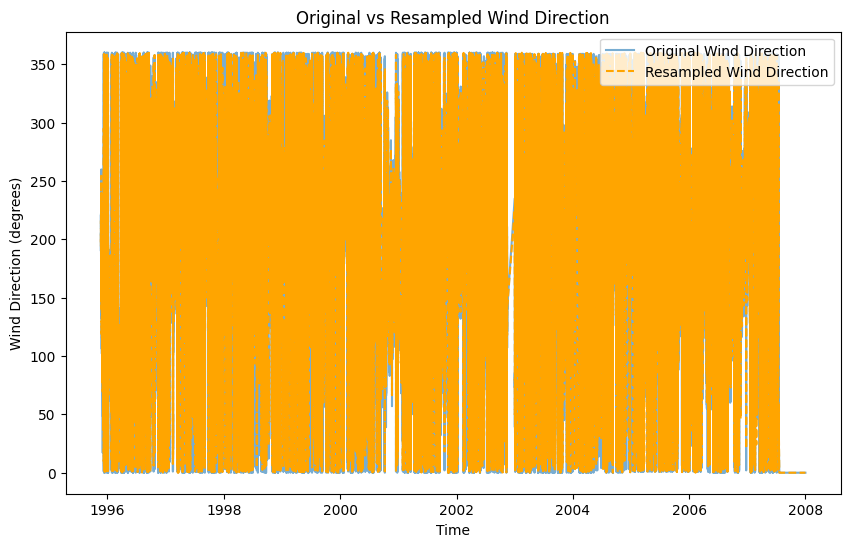

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(data_risoe_mast['date'], data_risoe_mast['wd77'], label='Original Wind Direction', alpha=0.6)
plt.plot(resampled_wind_direction.index, resampled_wind_direction, label='Resampled Wind Direction', linestyle='--', color='orange')

plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.title('Original vs Resampled Wind Direction')
plt.legend()
plt.show()

In [11]:
# Joining the data
filtered_resampled_risoe_mast = resampled_risoe_mast[(resampled_risoe_mast['date'] >= joined_start_datetime) & (resampled_risoe_mast['date'] <= joined_end_datetime)]
data_risoe_meso = data_risoe_meso.dropna()
filtered_risoe_meso = data_risoe_meso[(data_risoe_meso['TIMESTAMP'] >= joined_start_datetime) & (data_risoe_meso['TIMESTAMP'] <= joined_end_datetime)]

data = pd.merge(filtered_resampled_risoe_mast, filtered_risoe_meso, left_on='date', right_on='TIMESTAMP', how='inner')
display(data)
print(f"NaN count: {data.isna().sum()}")

,date,resampled_ws77,resampled_wd77,TIMESTAMP,WSP080,WDIR080
0,2001-06-10 15:00:00+00:00,2.023333,350.845121,2001-06-10 15:00:00+00:00,1.77,94.47
1,2001-06-10 16:00:00+00:00,1.918333,17.564987,2001-06-10 16:00:00+00:00,0.38,158.45
2,2001-06-10 17:00:00+00:00,3.928333,112.324846,2001-06-10 17:00:00+00:00,0.93,313.49
3,2001-06-10 18:00:00+00:00,1.686667,165.171691,2001-06-10 18:00:00+00:00,1.60,357.14
4,2001-06-10 19:00:00+00:00,1.568333,164.262038,2001-06-10 19:00:00+00:00,5.50,19.64
...,...,...,...,...,...,...
57435,2007-12-31 18:00:00+00:00,6.366667,0.000000,2007-12-31 18:00:00+00:00,6.43,11.71
57436,2007-12-31 19:00:00+00:00,8.723333,0.000000,2007-12-31 19:00:00+00:00,5.18,12.00
57437,2007-12-31 20:00:00+00:00,8.430000,0.000000,2007-12-31 20:00:00+00:00,4.98,6.64
57438,2007-12-31 21:00:00+00:00,8.136667,0.000000,2007-12-31 21:00:00+00:00,6.37,3.34


NaN count: date              0
resampled_ws77    0
resampled_wd77    0
TIMESTAMP         0
WSP080            0
WDIR080           0
dtype: int64


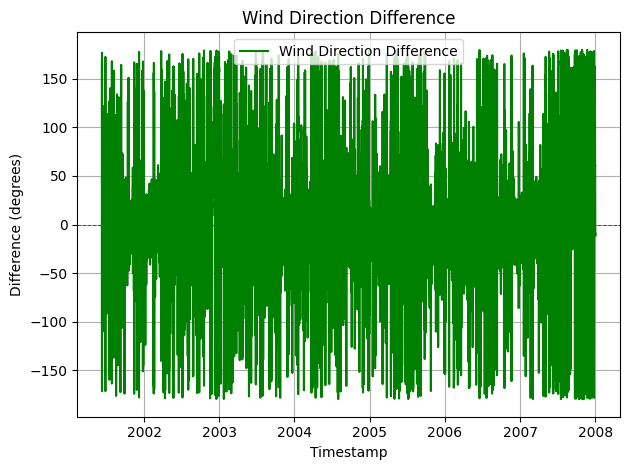

In [12]:
def circular_difference(angle1, angle2):
    return (angle1 - angle2 + 180) % 360 - 180

wind_direction_diff = circular_difference(data['resampled_wd77'], data['WDIR080'])
plt.plot(data['date'], wind_direction_diff, 
         label='Wind Direction Difference', color='green')
plt.title('Wind Direction Difference')
plt.xlabel('Timestamp')
plt.ylabel('Difference (degrees)')
plt.axhline(0, color='red', linestyle='--', linewidth=0.7)  # Add a line at y=0
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<b>Choice of regression models, brief explanation of the assumptions and summary of the results.</b>

Following regression models will be used after data preparation: Lasso, Ridge, Linear Regression.
In assignment1 we used above mentioned Regression models and all of them failed terribly in terms of accuracy and their scores. Out theory was that the data was not pre-prepared properly hence models failure. We forgot to include this in the assignment1 but Naive Bayes Model turned to work very well with data from assignment1 and therefore, although it is a non-linear system we will include it here out of curiosity to compare the results.

Our main assumption is, since the data is prepared very thoroughly this time, the models should do much better than previously. Additionally we have other small asumption - Lasso model should do considerably poorer than the rest since, according to the documentation and theory, it is not handling huge amounts of data very well.

Our explanation and understanding of the parameters we are using for judging efficiency of the models:
-Mean squared error:
-Coefficient of determination:

The summary and comparison of results can be found after each model.

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['resampled_ws77', 'resampled_wd77']] 
y = data['WSP080']  

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'alpha': np.logspace(-6, 0, 100)} 

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

best_lasso_model = grid_search.best_estimator_

best_lasso_model.fit(X_train_scaled, Y_train)

Y_pred_lasso = best_lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print("Best Alpha Value:", grid_search.best_params_['alpha'])
print("Lasso Regression Mean Squared Error (log scale): %.2f" % np.log10(mse_lasso))
print("Lasso Regression R^2 Score: %.2f" % r2_lasso)

Best Alpha Value: 1.6297508346206434e-05
Lasso Regression Mean Squared Error (log scale): 0.51
Lasso Regression R^2 Score: 0.66


Explanation of the results and comparison with the previous results

<b>Alpha Value</b>
Since we are using Standard Scaler, the best Alpha Value is a hyperparameter in Lasso Regression that helps reducing overfitting.

Relatively small alpha such as this, indicates that only small amount of help is optimal for this model.

If, for example, the alpha were larger it could indicate problems with underfitting.

<b>Mean Squared Error</b>

Regression model metric that indicates an average of the squared differences between predicted and actual values. 

<b>Lasso Regression R^2 Score</b>

The R^2 score represents the proportion of the variance in the target variable. R^2 score can be interpreted as a model's accuracy score with vales like 0.89 being very good score

<b>Current Results</b>

Best Alpha Value: 1.6297508346206434e-05

Lasso Regression Mean Squared Error (log scale): 0.51

Lasso Regression R^2 Score: 0.66

<b>VERSUS</b>

Lasso Regression Mean squared error (log scale): 1688985.06

Lasso Regression Coefficient of determination (log scale): 0.04

Accuracy score: 0.0426718446253499

Compared to previous results we can clearly see that the results are much better now. 

The key difference in between those models is the fact that data has been pre-prepared as well as for Lasso we have used best possible alpha instead of previously hard-coded 0.1 value.

The additional assumption that the Lasso model should do considerably poorer than the rest due to huge amounts of data has been proven to be <b>wrong</b>.

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['resampled_ws77', 'resampled_wd77']]
y = data['WSP080']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'alpha': np.logspace(-6, 0, 100)}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

best_ridge_model = grid_search.best_estimator_

best_ridge_model.fit(X_train_scaled, Y_train)

Y_pred_ridge = best_ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print("Best Alpha Value:", grid_search.best_params_['alpha'])
print("Ridge Regression Mean Squared Error (log scale): %.2f" % np.log10(mse_ridge))
print("Ridge Regression R^2 Score: %.2f" % r2_ridge)


Best Alpha Value: 1.519911082952933e-06
Ridge Regression Mean Squared Error (log scale): 0.51
Ridge Regression R^2 Score: 0.66


Results for Ridge Regression Model.

The results compared to assignment1 are not surprising - the model did visibly better compared to previously.

Mean Squre Error: 0.51 vs 1688979.53

R^2 Score: 0.66 vs 0.04

For experiment purposes, we have decided to run Ridge model without using Standard Scaler as well as without looking for the best alpha the MSE was <b>3.23</b> while mainating the same R^2 score.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['resampled_ws77', 'resampled_wd77']]
y = data['WSP080']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

Y_pred_linear = linear_model.predict(X_test_scaled)

mse_linear = mean_squared_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

print("Linear Regression Mean Squared Error (log scale): %.2f" % np.log10(mse_linear))
print("Linear Regression R^2 Score: %.2f" % r2_linear)

Linear Regression Mean Squared Error (log scale): 0.51
Linear Regression R^2 Score: 0.66


<b>Linear Regression Model results and comparison</b>

Linear Regression model does not use regularization, hence alpha search is not present as there is no alpha parameter to tune.
 
Let's begin with the comparison of the Linear Regression model now and compared to assignment1:

MSE: 0.51 vs 1688977.66

R^2 0.66 vs 0.04

Standar Scaler is present and we tested what would happen if we remove it.

Interestingly enough, there is no difference if we remove standard scaler and proceed with training the model with data that has not been scaled.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X = data[['resampled_ws77', 'resampled_wd77']]
y = data['WSP080']

y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {}".format(accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.8836176880222841

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8643
           1       0.83      0.66      0.73      2815
           2       0.65      0.43      0.52        30

    accuracy                           0.88     11488
   macro avg       0.79      0.68      0.73     11488
weighted avg       0.88      0.88      0.88     11488



<b>Gaussian Naive Bayes</b>

We would like to introduce GaussianNB as a little curiosity to this assignment.

In assignment1 we also had it but forgot to put it in the final version.

With the data from assignment1 Gaussiabn NB has outperformed all the linear models and score an impressive Accuracy score of: 0.8965695569729357

Our theory was that, non-linearity of GaussianNB model worked to our advantave since the model could predict other dependencies otherwise inaccessible for linear models.

Once again, GaussianNB has proven to be superior to linear models, scoring: 0.8836176880222841.

Additionally, we would like to explain the y_binned parameter. 

From pandas library throw our 'WSP080' values into three categories labeled; 0: low, 1: medium, 2: high. 

This helps with analyzing the patterns (we have also tried to assign y to 'WSP080' and it has resulted in the error in the code)